In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

### 1. Data 

In [2]:
# data source: https://github.com/amcquistan/WeatherPredictPythonML
df_weather = pd.read_csv("end-part2_df.csv", index_col="date")
df_weather.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,1016.0,...,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
2015-01-05,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,1033.0,...,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2015-01-06,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,1032.0,...,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
2015-01-07,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,1036.0,...,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
2015-01-08,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,1035.0,...,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00


In [3]:
# select 2016 data only
df_2016 = df_weather.filter(like="2016", axis=0)
df_2016.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,1030.0,...,-11.0,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00
2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,1029.0,...,-10.0,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76
2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,1025.0,...,-16.0,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00
2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,1030.0,...,-11.0,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00
2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,1032.0,...,-12.0,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00


In [4]:
# extract months from date
df_2016.reset_index(inplace=True)
df_2016["month"] = df_2016["date"].apply(lambda s: int(s.split("-")[1]))
df_2016.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3,month
0,2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,...,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00,1
1,2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,...,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76,1
2,2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,...,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00,1
3,2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,...,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00,1
4,2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,...,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00,1


### 2. Plot `meantempm`

In [5]:
df_jan = df_2016.query("month==1")
df_jan.head()

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3,month
0,2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,...,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00,1
1,2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,...,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76,1
2,2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,...,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00,1
3,2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,...,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00,1
4,2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,...,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00,1


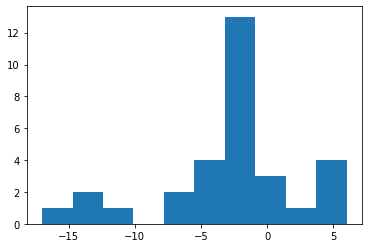

In [6]:
from scipy.stats import gaussian_kde

fig, ax = plt.subplots()
hists = ax.hist(df_jan["meantempm"])
plt.show()

In [7]:
for hist in hists:
    print(hist)

[ 1.  2.  1.  0.  2.  4. 13.  3.  1.  4.]
[-17.  -14.7 -12.4 -10.1  -7.8  -5.5  -3.2  -0.9   1.4   3.7   6. ]
<BarContainer object of 10 artists>


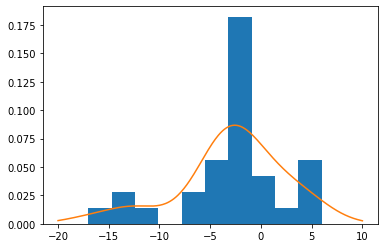

In [8]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(df_jan["meantempm"])
X = np.linspace(-20, 10, 301)

fig, ax = plt.subplots()
hists = ax.hist(df_jan["meantempm"], density=True)
ax.plot(X, kde(X))
plt.show()

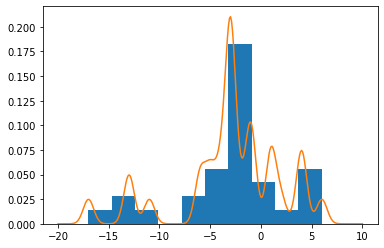

In [9]:
kde = gaussian_kde(df_jan["meantempm"])
kde.covariance_factor = lambda : .1
kde._compute_covariance()
X = np.linspace(-20, 10, 301)

fig, ax = plt.subplots()
hists = ax.hist(df_jan["meantempm"], density=True)
ax.plot(X, kde(X))
plt.show()

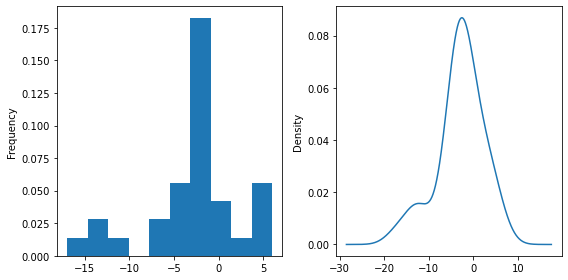

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
df_jan["meantempm"].plot.hist(density=True, ax=ax[0])
df_jan["meantempm"].plot.kde(ax=ax[1])
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


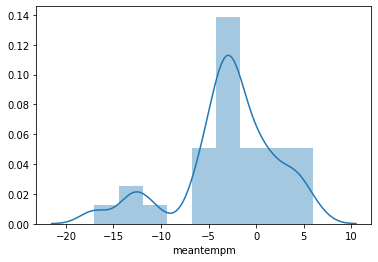

In [11]:
import seaborn as sns

fig, ax = plt.subplots()
sns.distplot(df_jan["meantempm"], kde_kws={"bw":1.5}, ax=ax)
plt.show()

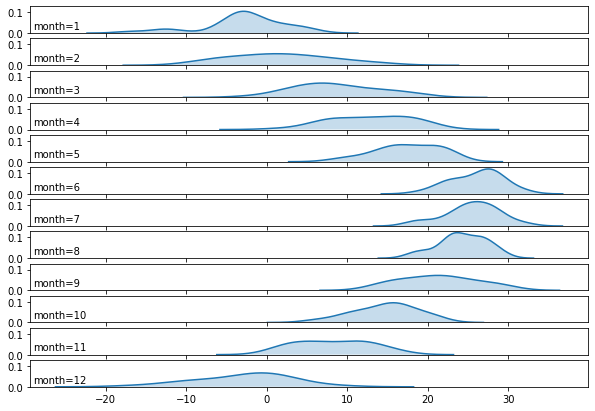

In [12]:
fig, axes = plt.subplots(nrows=12, figsize=(10,7), sharex=True, sharey=True)

for i, ax in enumerate(axes, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"], shade=True, legend=False, ax=ax)
    ax.text(-29, 0.02, f"month={i}")    

In [13]:
# https://stackoverflow.com/questions/6557553/get-month-name-from-number

import calendar

for month_idx in range(1, 13):
    print (calendar.month_name[month_idx])
    print (calendar.month_abbr[month_idx])
    print ("")

January
Jan

February
Feb

March
Mar

April
Apr

May
May

June
Jun

July
Jul

August
Aug

September
Sep

October
Oct

November
Nov

December
Dec



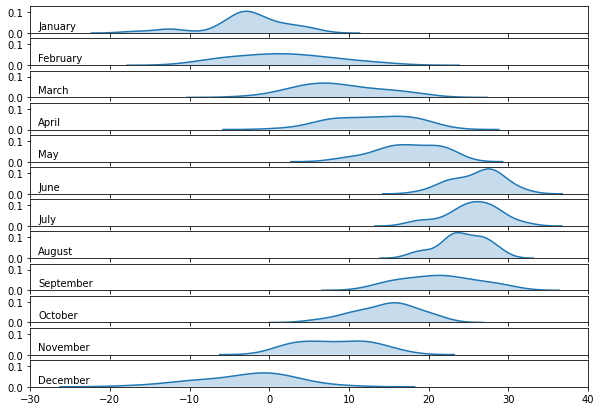

In [14]:
fig, axes = plt.subplots(nrows=12, figsize=(10,7), sharex=True, sharey=True)

for i, ax in enumerate(axes, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"], shade=True, legend=False, ax=ax)
    ax.set_xlim(-30, 40)
    
    ax.text(-29, 0.02, calendar.month_name[i])    

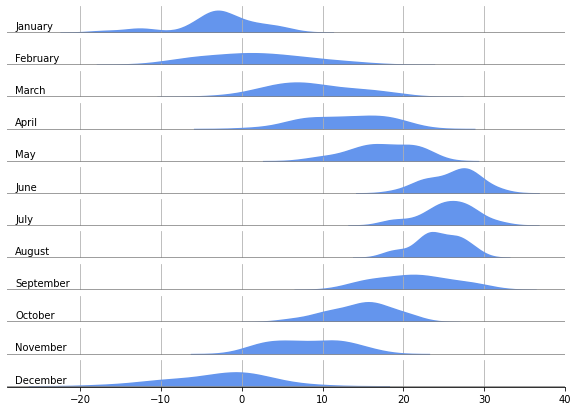

In [15]:
fig, axes = plt.subplots(nrows=12, figsize=(10,7), sharex=True, sharey=True)

for i, ax in enumerate(axes, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"], 
                shade=True, color="cornflowerblue", alpha=1,
                legend=False, ax=ax)
    ax.set_xlim(-29, 40)    
    ax.text(-28, 0.02, calendar.month_name[i]) 
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    if i != 12:
        ax.spines["bottom"].set_visible(False)
        ax.tick_params(axis="x", length=0)
    
    ax.set_yticks([])    
    
    ax.grid(axis="x")
    ax.axhline(0, color="gray")

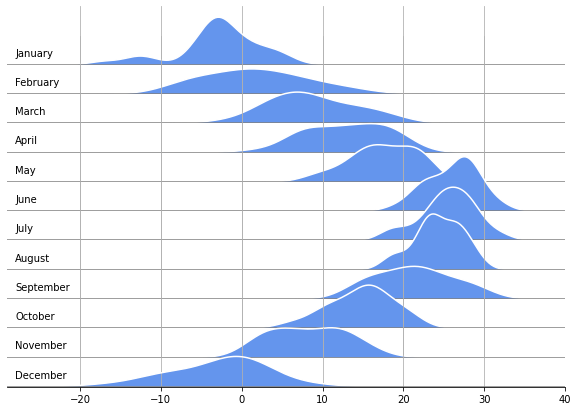

In [16]:
fig, axes = plt.subplots(nrows=12, figsize=(10,7), sharex=True, sharey=True)
fig.patch.set_alpha(0)

for i, ax in enumerate(axes, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"], 
                shade=True, color="w", facecolor="cornflowerblue", alpha=1,
                legend=False, ax=ax)
    ax.set_xlim(-29, 40)    
    ax.text(-28, 0.02, calendar.month_name[i]) 
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    if i != 12:
        ax.spines["bottom"].set_visible(False)
        ax.tick_params(axis="x", length=0)
    
    ax.set_yticks([])    
    
    ax.grid(axis="x")
    ax.axhline(0, color="gray")
    ax.patch.set_alpha(0)
    
fig.subplots_adjust(hspace=-0.5)    

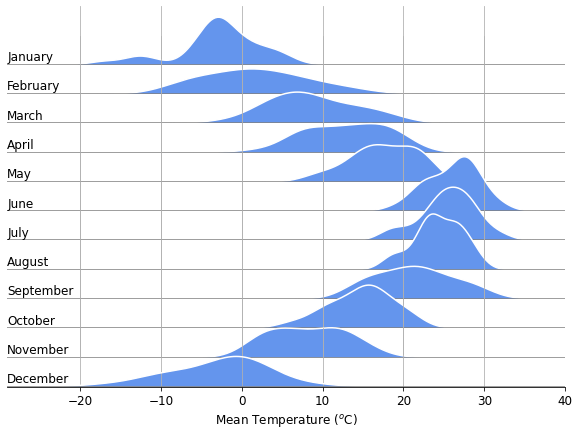

In [17]:
fig, axes = plt.subplots(nrows=12, figsize=(10,7), sharex=True, sharey=True)
fig.patch.set_alpha(0)

for i, ax in enumerate(axes, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"], 
                shade=True, color="w", facecolor="cornflowerblue", alpha=1,
                legend=False, ax=ax)
    ax.set_xlim(-29, 40)    
    ax.text(-29, 0.01, calendar.month_name[i], fontdict={"fontsize":"large"}) 
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    if i != 12:
        ax.spines["bottom"].set_visible(False)
        ax.tick_params(axis="x", length=0)
    else:
        ax.tick_params(axis="x", labelsize="large")
        ax.set_xlabel("Mean Temperature ($^o$C)", fontdict={"fontsize":"large"})
    
    ax.set_yticks([])    
    
    ax.grid(axis="x")
    ax.axhline(0, color="gray")
    ax.patch.set_alpha(0)
    
fig.subplots_adjust(hspace=-0.5)    

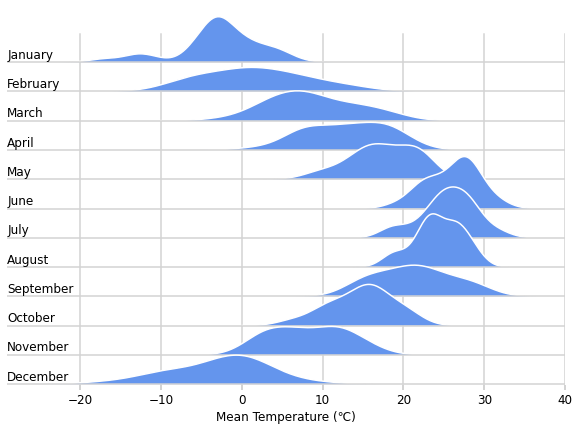

In [18]:
fig, axes = plt.subplots(nrows=12, figsize=(10,7), sharex=True, sharey=True)
fig.patch.set_alpha(0)

for i, ax in enumerate(axes, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"], 
                shade=True, color="w", facecolor="cornflowerblue", alpha=1,
                legend=False, ax=ax)
    ax.set_xlim(-29, 40)    
    ax.text(-29, 0.01, calendar.month_name[i], fontdict={"fontsize":"large"}) 
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    if i != 12:
        ax.tick_params(axis="x", length=0)
    else:
        ax.tick_params(axis="x", direction="inout", color="lightgray", 
                       length=5, width=2, labelsize="large")
        ax.set_xlabel("Mean Temperature (℃)", fontdict={"fontsize":"large"})
    
    ax.set_yticks([])    
    
#     ax.grid(axis="x")
    xticks = ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick, xtick], [0, 0.065], color='lightgray', zorder=0)
        
    ax.axhline(0, color="lightgray")
    ax.patch.set_alpha(0)
    
fig.subplots_adjust(hspace=-0.5)    